In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import os

In [5]:
path = os.path.expanduser("~/data/strava/track.gpx")
output_path = os.path.expanduser("~/data/strava/teste_out.gpx")

In [6]:
xmlns = "http://www.topografix.com/GPX/1/1"
date_format = "%Y-%m-%dT%H:%M:%SZ"

In [7]:
et = ET.parse(path)

In [30]:
ns = {'gpx': 'http://www.topografix.com/GPX/1/1',
      'gpxtpx': 'http://www.garmin.com/xmlschemas/TrackPointExtension/v1'}

In [31]:
et.getroot().getchildren()[0]

<Element '{http://www.topografix.com/GPX/1/1}metadata' at 0x7fae56eb2f48>

In [77]:
items = et.findall(""".//gpx:trkpt/gpx:extensions/gpxtpx:TrackPointExtension/gpxtpx:hr""", ns)

In [95]:
hrs = []
for item in items:
    hrs.append(item.text)

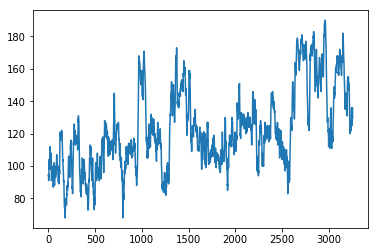

In [96]:
hrs = pd.Series(hrs).apply(int)
hrs.plot()

In [97]:
hrs = hrs.apply(lambda x: x * 1.7 if (x < 90) else x).apply(lambda x: x * 1.3 if (x < 130) else x)

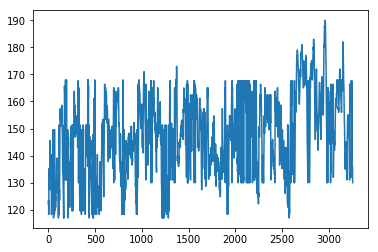

In [98]:
hrs.plot()

In [12]:
first_time = times[0]
last_time = times[-1]

In [13]:
interval = last_time - first_time

In [14]:
interval

Timedelta('0 days 03:26:38')

In [15]:
items[0].text

'2019-04-09T22:52:31Z'

In [102]:
n = len(items)
time1 = first_time
time2 = first_time + (interval * 0.7)
new_hr = pd.date_range(time1, time2, periods=n).strftime(date_format)

In [103]:
for i, item in enumerate(items):
    item.text = str(hrs[i])

In [104]:
et.write(output_path, encoding="UTF-8", xml_declaration=True, method="xml")

In [105]:
with open(output_path, "r") as fid:
    text = fid.read()

In [106]:
text = text.replace("ns0:", "")
text = text.replace("ns0", "")
text = text.replace("ns2", "gpxtpx")

In [107]:
with open(output_path, "w") as fid:
    fid.write(text)

In [59]:
trackpoints[0]

<Element '{http://www.topografix.com/GPX/1/1}trkpt' at 0x7fae38dc21d8>

In [52]:
hrs

['94',
 '95',
 '94',
 '91',
 '94',
 '97',
 '104',
 '104',
 '103',
 '100',
 '99',
 '98',
 '99',
 '98',
 '102',
 '106',
 '110',
 '111',
 '112',
 '110',
 '107',
 '104',
 '107',
 '104',
 '104',
 '102',
 '102',
 '103',
 '106',
 '108',
 '103',
 '97',
 '92',
 '91',
 '92',
 '95',
 '95',
 '98',
 '96',
 '99',
 '100',
 '99',
 '97',
 '96',
 '94',
 '93',
 '93',
 '96',
 '97',
 '97',
 '94',
 '88',
 '87',
 '90',
 '90',
 '90',
 '92',
 '92',
 '93',
 '97',
 '99',
 '102',
 '98',
 '94',
 '91',
 '88',
 '92',
 '92',
 '93',
 '96',
 '96',
 '99',
 '99',
 '98',
 '97',
 '95',
 '94',
 '93',
 '96',
 '95',
 '97',
 '97',
 '99',
 '100',
 '99',
 '102',
 '103',
 '104',
 '107',
 '107',
 '104',
 '103',
 '102',
 '100',
 '98',
 '101',
 '100',
 '97',
 '97',
 '97',
 '98',
 '100',
 '97',
 '95',
 '93',
 '91',
 '90',
 '90',
 '90',
 '93',
 '93',
 '91',
 '91',
 '92',
 '89',
 '93',
 '96',
 '97',
 '98',
 '95',
 '102',
 '106',
 '111',
 '116',
 '118',
 '121',
 '121',
 '121',
 '121',
 '118',
 '119',
 '120',
 '120',
 '117',
 '117',
 '11